Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

Here, we will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

## 1. Load and inspect the data

Load the CSV files into `yearly` and `monthly` data frames and check the data.

In [103]:
# Imported libraries
library(tidyverse)

# yearly data
yearly <- read_csv("data/yearly_deaths_by_clinic.csv")
yearly

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


In [104]:
# monthly data
monthly <- read_csv("data/monthly_deaths.csv")
monthly

Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,births,deaths
<date>,<dbl>,<dbl>
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2
1841-06-01,200,10
1841-07-01,190,16
1841-08-01,222,3
1841-09-01,213,4


## 2. Add a new column with the proportions

Add a `proportion_deaths` column to each df, calculating the proportion of deaths per number of births for each year in `yearly` and `month` in monthly.

In [105]:
# Add proportion_deaths to yearly, births & deaths columns
yearly <- yearly %>%
	mutate(proportion_deaths = deaths / births)

yearly

year,births,deaths,clinic,proportion_deaths
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384
1841,2442,86,clinic 2,0.03521704
1842,2659,202,clinic 2,0.07596841
1843,2739,164,clinic 2,0.05987587


In [106]:
# Add proportion_deaths to monthly, births & deaths columns
monthly <- monthly %>%
	mutate(proportion_deaths = deaths / births)

monthly

date,births,deaths,proportion_deaths
<date>,<dbl>,<dbl>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000
1841-07-01,190,16,0.084210526
1841-08-01,222,3,0.013513514
1841-09-01,213,4,0.018779343


## 3. Make a line plot for each data frame

Create two ggplot line plots: one for the yearly proportion of deaths and another for the monthly proportion of deaths. 

For the yearly plot, create a different colored line for each clinic.

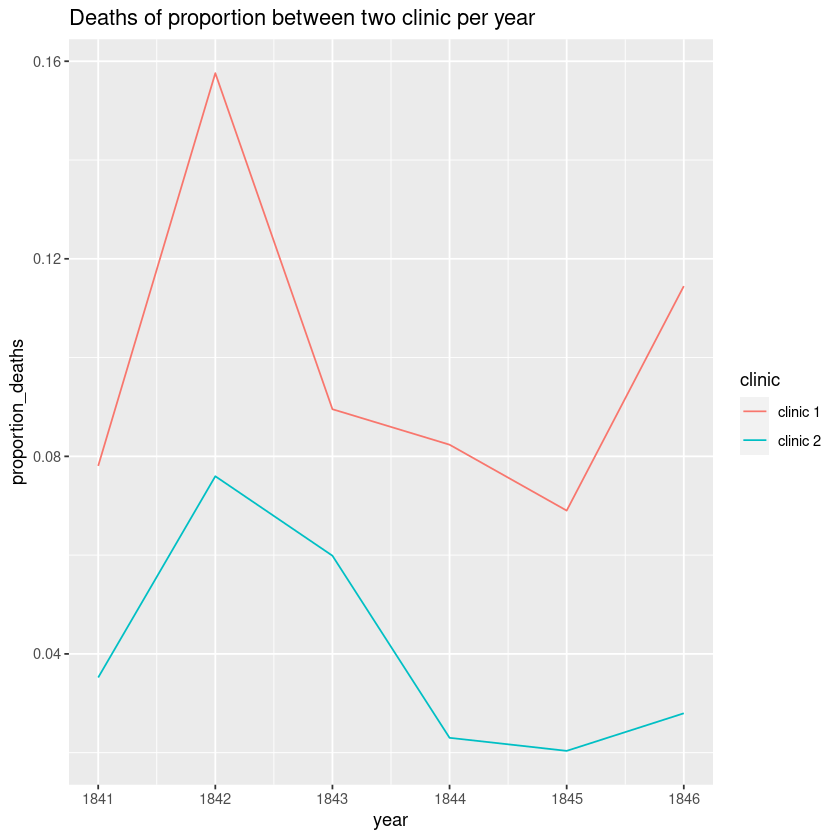

In [107]:
# line plot for yearly proportion of deaths, color by clinic
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) +
	geom_line() +
	ggtitle("Deaths of proportion between two clinic per year")

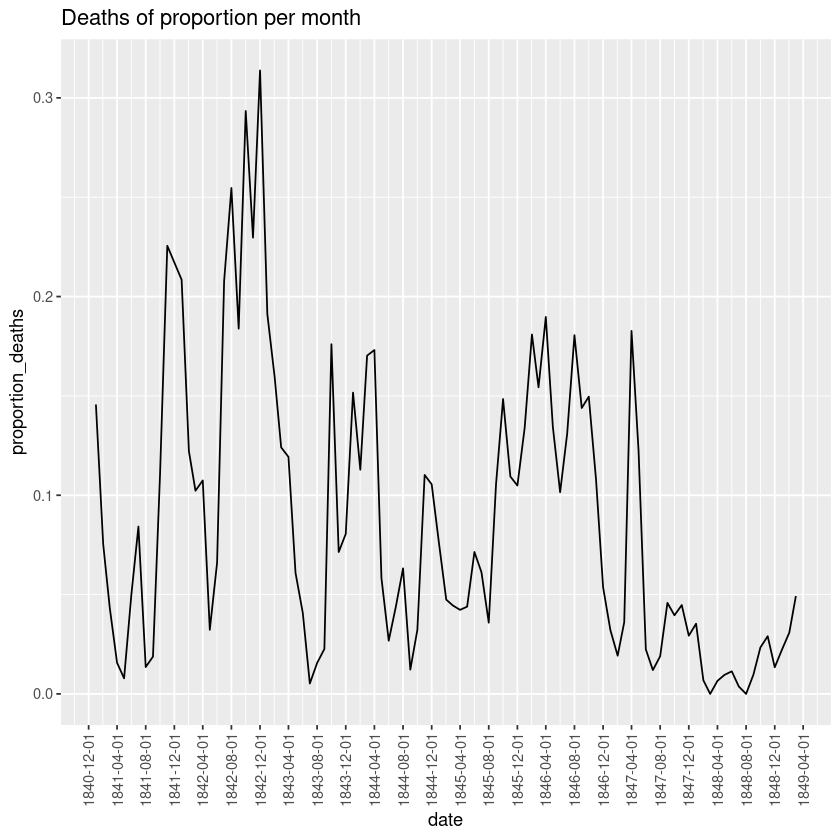

In [108]:
# line plot for monthly proportion of deaths
ggplot(monthly, aes(x = date, y = proportion_deaths)) +
	geom_line() +
	ggtitle("Deaths of proportion per month") +
	scale_x_date(breaks = "4 month") +
	theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0.5))

## 4. Visualize the threshold

Add a `handwashing_started` boolean column to monthly using June 1st, 1847 as the threshold; `TRUE` should mean that handwashing has started at the clinic. Plot the new df with different colored lines depending on `handwashing_started`.

In [109]:
# Add handwashing_started column to monthly to create before & after 1847-06-01 (intervation begin) two categories
monthly <- monthly %>%
	mutate(handwashing_started = if_else(date >= '1847-06-01', TRUE, FALSE))

monthly

date,births,deaths,proportion_deaths,handwashing_started
<date>,<dbl>,<dbl>,<dbl>,<lgl>
1841-01-01,254,37,0.145669291,FALSE
1841-02-01,239,18,0.075313808,FALSE
1841-03-01,277,12,0.043321300,FALSE
1841-04-01,255,4,0.015686275,FALSE
1841-05-01,255,2,0.007843137,FALSE
1841-06-01,200,10,0.050000000,FALSE
1841-07-01,190,16,0.084210526,FALSE
1841-08-01,222,3,0.013513514,FALSE
1841-09-01,213,4,0.018779343,FALSE


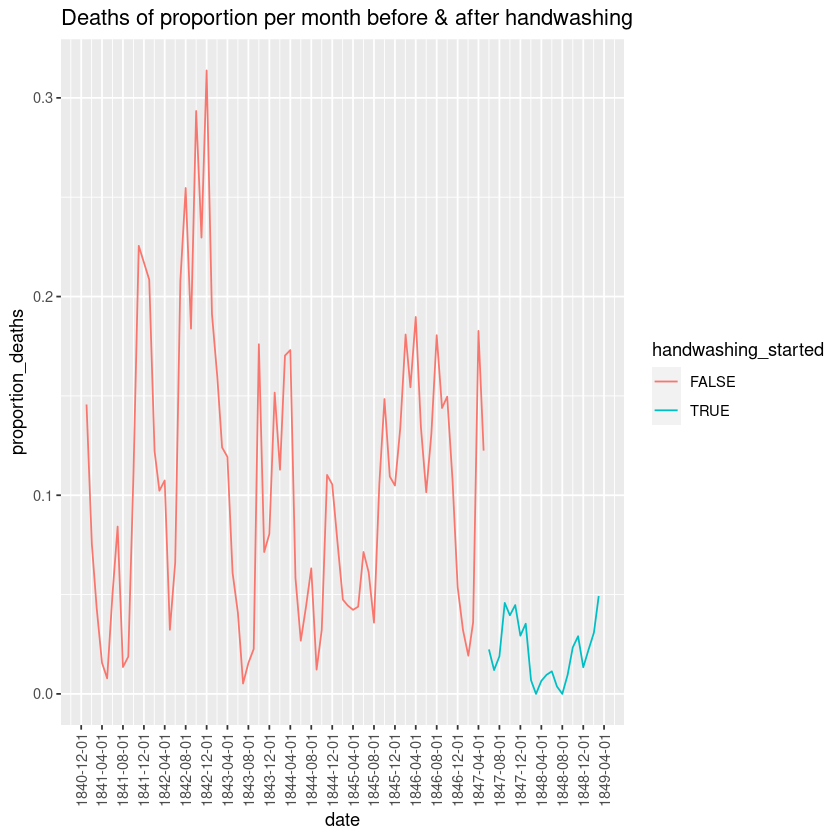

In [110]:
# line plot with proportion_deaths, color by handwashing_started
ggplot(monthly, aes(x = date, y = proportion_deaths, color = handwashing_started)) +
	geom_line() +
	ggtitle("Deaths of proportion per month before & after handwashing") +
	scale_x_date(breaks = "4 month") +
	theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 0.5))

## 5. Calculate the mean proportion of deaths

Calculate the mean proportion of deaths before and after handwashing from the monthly data.

In [111]:
# df monthly_summary contain: mean proportion of deaths before and after handwashing
monthly_summary <- monthly %>%
	group_by(handwashing_started) %>%
	summarise(mean_proportion_deaths = mean(proportion_deaths))

monthly_summary

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338
